In [ ]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math 
from numpy import linalg as la
%load_ext autoreload
%autoreload 2

In this notebook multiclass logistic regression or softmax regression is considered. The negative log likelihood  is derived and is differentiated to find a gradient that can be used in the Gradient Descent  and Stochastic Gradient Descent algorithm. This classifier can determine based on some features  we must extract from our dataset which class and item belongs to rather than whether it just belongs to a class or does not (binary decision).

It is possible  to use a binary classifier when there are more than two classes this can be done by what is known as one vs all classification where the number of times we must run the classifier is equal to the number of classes. For each class we determine  some weights then the most probable outcome is then determined. Softmax allows us to complete this process in a single step. 

The main focus here is on search and optimization algorithms, having covered the other aspects previously. On larger and more complicated datasets this is the more relevant  issue. It can be seen that even on the moderately sized mnist algorithm choice does not have a large impact however it is important the see the bigger picture and recognise for datasets that are likely to be encountered which of the algorithms are computationally  tractable. 

### Import the data for wine


In [ ]:
# Import the data using pandas library 
wines_pd = pd.read_csv('wine.data')

### Clean and prepare the data 


In [ ]:
class_id = pd.get_dummies(wines_pd["Class Identifier"], drop_first = False)
wines_pd = pd.concat([class_id,wines_pd], axis = 1)


wine = wines_pd.values

y1                                = wine[:,0]
y2                                = wine[:,1]
y3                                = wine[:,2]
Y                                 = wine[:,3]
Alcohol                           = wine[:,4]
Malic_acid                        = wine[:,5]
Ash                               = wine[:,6]
Alcalanity_of_ash                 = wine[:,7]
Magnesium                         = wine[:,8]
Total_phenols                     = wine[:,9]
Flavanoids                        = wine[:,10]
Nonflavanoid_phenols              = wine[:,11]
Proanthocyanins                   = wine[:,12]
Color_intensity                   = wine[:,13]
Hue                               = wine[:,14]
OD280OD315_of_diluted_wines       = wine[:,15]
Proline                           = wine[:,16]

# Subtract one from the class labels so index can start from 0
# This is so when we use the argmax function the index matches the label
Y = wine[:,3] - 1

# One hot encoding of class labels
y = np.c_[y1,y2,y3]

### Select feautures and rescale

In [ ]:
from helpers import sample_data,load_data, standardise

# Choose your identifier
X = np.c_[Alcohol,Malic_acid,Ash,Alcalanity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280OD315_of_diluted_wines,Proline]

# Standardize
x, mean_x, std_x = standardise(X)

# Augamented feauture vector
x = np.c_[np.ones((y.shape[0], 1)), x]

### Derivation of the negative log likelehood and gradient for the softmax function

$$\log{\bigg(\frac{\pi_{ij}}{\pi_{iJ}}\bigg)}=\log{\bigg(\frac{\pi_{ij}}{1-\sum_{j=1}^{J-1}\pi_{ij}}\bigg)=\sum_{k=0}^{K}x_{ik}\omega_{kj}}$$

$$i = 1,2,...,N$$
$$j = 1,2,...,J-1$$

Solving for $\pi_{ij}$, we have:

$$\pi_{ij} = \frac{e^{\sum_{k=0}^{K}x_{ik}\omega_{kj}}}{1+\sum_{j=1}^{J-1}e^{\sum_{k=0}^{K}x_{ik}\omega_{kj}}}$$ 
$j<J$

$$\pi_{iJ} = \frac{1}{1+\sum_{j=1}^{J-1}e^{\sum_{k=0}^{K}x_{ik}\omega_{kj}}}$$




Calculating the log likelehood

$$f(y|\omega) =\prod_{i=1}^{N}\left[\frac{n_i!}{\prod_{j=1}^{J}y_{ij}!}\cdot\prod_{j=1}^{J}\pi_{ij}^{y_{ij}}\right] $$
 

$$L(\omega|y)\simeq\prod_{i=1}^{N}\prod_{j=1}^{J}\pi_{ij}^{y_{ij}}  $$

$$ \prod_{i=1}^{N}\prod_{j=1}^{J-1}\pi_{ij}^{y_{ij}}\cdot\pi_{iJ}^{n_i-\sum_{j=1}^{J-1}y_{ij}}$$

$$=\prod_{i=1}^{N}\prod_{j=1}^{J-1}\pi_{ij}^{y_{ij}}\frac{\pi_{iJ}^{n_i}}{\pi_{iJ}^{\sum_{j=1}^{J-1}y_{ij}}}   $$

$$=\prod_{i=1}^{N}\prod_{j=1}^{J-1}\pi_{ij}^{y_{ij}}\frac{\pi_{iJ}^{n_i}}{\prod_{j=1}^{J-1}\pi_{iJ}^{y_{ij}}} $$


$$\prod_{i=1}^{N}\prod_{j=1}^{J-1}\left(\frac{\pi_{ij}}{\pi_{iJ}}\right)^{y_{ij}}\cdot\pi_{iJ}^{n_i}   $$

$$\prod_{i=1}^{N}\prod_{j=1}^{J-1}\left(e^{\sum_{k=0}^{K}x_{ik}\omega_{kj}}\right)^{y_{ij}} \cdot\left(\frac{1}{1+\sum_{j=1}^{J-1}e^{\sum_{k=0}^{K}x_{ik}\omega_{kj}}}\right)^{n_i}  $$

$$=\prod_{i=1}^{N}\prod_{j=1}^{J-1}e^{y_{ij}\sum_{k=0}^{K}x_{ik}\omega_{kj}}\cdot\left(1+\sum_{j=1}^{J-1}e^{\sum_{k=0}^{K}x_{ik}\omega_{kj}}\right)^{-n_i}   $$

$$l\left(\omega\right)=\sum_{i=1}^{N}\sum_{j=1}^{J-1}\left(y_{ij}\sum_{k=0}^{K}x_{ik}\omega_{kj}\right)-n_i\log\left(1+\sum_{j=1}^{J-1}e^{\sum_{k=0}^{K}x_{ik}\omega_{kj}}\right) $$



Calculating the gradient 

$$\frac{\partial\left(\omega\right)}{\partial\omega_{kj}}=\sum_{i=1}^{N}y_{ij}x_{ik}-n_i\cdot\frac{1}{1+\sum_{j=1}^{J-1}e^{\sum_{k=0}^{K}x_{ik}\omega_{kj}}} \cdot\frac{\partial}{\partial\omega_{kj}}\left(1+\sum_{j=1}^{J-1}e^{\sum_{k=0}^{K}x_{ik}\omega_{kj}}\right) $$

$$ = \sum_{i=1}^{N}y_{ij}x_{ik}-n_i\cdot\frac{1}{1+\sum_{j=1}^{J-1}e^{\sum_{k=0}^{K}x_{ik}\omega_{kj}}}\cdot{e^{\sum_{k=0}^{K}x_{ik}\omega_{kj}}}\cdot\frac{\partial}{\partial\omega_{kj}}\sum_{k=1}^{K}x_{ik}\omega_{kj}   $$


$$= \sum_{i=1}^{N}y_{ij}x_{ik}-n_i\cdot\frac{1}{1+\sum_{j=1}^{J-1}e^{\sum_{k=0}^{K}x_{ik}\omega_{kj}}}\cdot{e^{\sum_{k=0}^{K}x_{ik}\omega_{kj}}}\cdot{x_{ik}}  $$


$$ = \sum_{i=1}^{N}y_{ij}x_{ik}-n_i\pi_{ij}x_{ik}$$

### Model building 

In [ ]:
# Softmax function that prevents overflow

def softmax(t):
    t -= np.max(t)
    softmax = (np.exp(t).T / np.sum(np.exp(t),axis=1)).T
    return softmax


$$p(y=c|x,W) = \frac{\exp(w_c^Tx)}{\sum_{c'=1}^{C}\exp(w_{c'}^Tx)}    $$


In [ ]:
# Function that returns the loss and gradient for regularized softmax regression

def penalised_softmax_regression(y, x, w, alpha):
    len_x = x.shape[0]
    likelehood = softmax(np.dot(x,w))
    loss = (-1 / len_x) * np.sum(y * np.log(likelehood)) + (alpha/2)*np.sum(w*w)
    grad = (-1 / len_x) * np.dot(x.T,(y - likelehood)) + alpha*w
    return loss, grad

In [ ]:
# One update using Gradient Descent 

def learning_by_penalised_gradient(y, x, w, tau, alpha):
    loss,grad = penalised_softmax_regression(y, x, w, alpha)
    w = w - tau*(grad)
    return loss, w

In [ ]:
# Calculates the accuracy of the model by considering whether the predicted class is
# is equal to the true class

def accuracy(x,w,Y):
    likelehood = softmax(np.dot(x,w))
    predicted_class = np.argmax(likelehood,axis=1)
    acc = sum(predicted_class == Y)/(float(len(Y)))
    return acc

### Gradient Descent vs Stochastic Gradient Descent 

Here we look at the difference between Gradient Descent and Stochastic Gradient descent. These two techniques are directly used or are the basis for many of the optimization algorithms in machine learning. 

In [ ]:
# Gradient descent 

w = np.zeros([x.shape[1],3])
max_iter = 50
tau = 1e-1
alpha = 0
threshold = 1e-8
losses = []

for iter in range(max_iter):
# get loss and update w.
    loss, w = learning_by_penalised_gradient(y, x, w, tau, alpha)    
    losses.append(loss)
    if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
        break

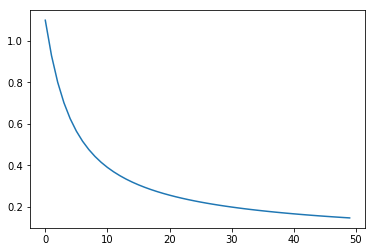

In [ ]:
# Plot of the losses
plt.plot(losses)

In [ ]:
losses[-1]

0.14655995499429791

This is expected to be seen, the losses descreasing at each iteration. For convex functions this method guarantees to find the global minimum with a judicious choice of learning rate. 

In [ ]:
def batch_iter(y, tx, batch_size, num_batches=1, shuffle=True):
    """
    Generate a minibatch iterator for a dataset.
    Takes as input two iterables (here the output desired values 'y' and the input data 'tx')
    Outputs an iterator which gives mini-batches of `batch_size` matching elements from `y` and `tx`.
    Data can be randomly shuffled to avoid ordering in the original data messing with the randomness of the minibatches.
    Example of use :
    for minibatch_y, minibatch_tx in batch_iter(y, tx, 32):
        <DO-SOMETHING>
    """
    data_size = len(y)

    if shuffle:
        shuffle_indices = np.random.permutation(np.arange(data_size))
        shuffled_y = y[shuffle_indices]
        shuffled_tx = tx[shuffle_indices]
    else:
        shuffled_y = y
        shuffled_tx = tx
    for batch_num in range(num_batches):
        start_index = batch_num * batch_size
        end_index = min((batch_num + 1) * batch_size, data_size)
        if start_index != end_index:
            yield shuffled_y[start_index:end_index], shuffled_tx[start_index:end_index]

Stochastic Gradient Descent works similarly to normal Gradient Descent however instead of the entire data set being used to update the weights we use a batch randomly selected from the sample that approximates the true gradient. It is much faster however convergence to the minimum is not gauranteed but just likely under some conditions. It is just the expectation that it will converge to the true value. 

In [ ]:
def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            # compute a stochastic gradient and loss
            _,grad = penalised_softmax_regression(y_batch, tx_batch, w, 0)
            # update w through the stochastic gradient update
            w = w - gamma * grad
            # calculate loss
            loss,_ = penalised_softmax_regression(y, x, w, 0)
            # store w and loss
            ws.append(w)
            losses.append(loss)

    return losses, ws

In [ ]:
# SGD
max_iters = 50
gamma = 1e-1
batch_size = 15

# Initialization
w_initial = np.zeros((x.shape[1], 3))

# Start SGD.
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, x, w_initial, batch_size, max_iters, gamma)

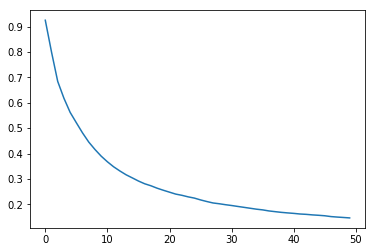

In [ ]:
# Plot the losses against the iterations 
plt.plot(sgd_losses)

In [ ]:
sgd_losses[-1]

0.1464437683963515

This plot is more surprising, monotonic decrease of the loss function is not gauranteed. Maybe in this example the function is well behaved but this is not usually what would be expected and on larger, more complicated datasets like MNIST what would be the typical convergence is observed.

In [ ]:
# Split data with extra one hot coded item

def split_data(x, y, Y, ratio, myseed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(myseed)
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    Y_tr = Y[index_tr]
    Y_te = Y[index_te]
    return x_tr, x_te, y_tr, y_te, Y_tr, Y_te

In [ ]:
# Gradient descent with out of sample sampling 

x_tr, x_te, y_tr, y_te, Y_tr, Y_te = split_data(x, y, Y, 0.8, myseed=9)
w = np.zeros([x_tr.shape[1],3])
max_iter = 50
tau = 1e-1
alpha = 0
threshold = 1e-8
losses = []
   
for iter in range(max_iter):
# get loss and update w.
    loss, w = learning_by_penalised_gradient(y_tr, x_tr, w, tau, alpha)    
    losses.append(loss)
    if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
        break

In [ ]:
# Accuracy of the classifier (test)
training_accuracy = accuracy(x_tr,w,Y_tr)
print('training accuracy =', training_accuracy)

training accuracy = 0.9859154929577465


In [ ]:
# Accuracy of the classifier (train)
testing_accuracy = accuracy(x_te,w,Y_te)
print('testing accuracy =',testing_accuracy)

testing accuracy = 1.0


### Import the MNIST data and extract the features

MNIST is an image classification problem this is significantly different from the previous two. Wine required us to just standardise continuous  variables, in titanic the use of the dummy variables was required but still trivial to implement. Extracting the features  from an image is more complex. The image is 28x28 so there are 784 features already significantly more than the previous 2. 

In [ ]:
def load_mnist(path, kind = 'train'):
    
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels



images_tr, labels_tr = load_mnist('MNIST/')
images_tst, labels_tst = load_mnist('MNIST/', 't10k')


def indices_to_one_hot(data, nb_classes):
    """Convert an iterable of indices to one-hot encoded labels."""
    targets = np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets]



y = indices_to_one_hot(labels_tr,10 )
x = images_tr
Y = labels_tr

In [ ]:
# Gradient descent 

w = np.zeros([x.shape[1],10])
max_iter = 50
tau = 1e-5
alpha = 0
threshold = 1e-8
losses = []

for iter in range(max_iter):
# get loss and update w.
    loss, w = learning_by_penalised_gradient(y, x, w, tau, alpha)    
    losses.append(loss)
    if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
        break

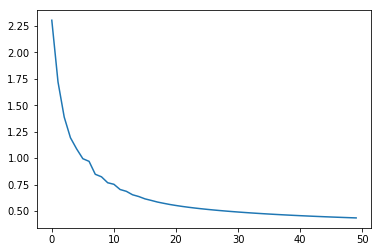

In [ ]:
plt.plot(losses)

Here we can see something interesting even for normal gradient descent between 0 and 10 we can see the minimization of our loss function is not smooth whilst always decreasing.

In [ ]:
# Accuracy found from the weights from gradient descent 
accuracy(images_tst,w,labels_tst)

0.8929

In [ ]:
max_iters = 50
gamma = 1e-5
batch_size = 15

# Initialization
w_initial = np.zeros((x.shape[1], 10))

# Start SGD.

sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, x, w_initial, batch_size, max_iters, gamma)


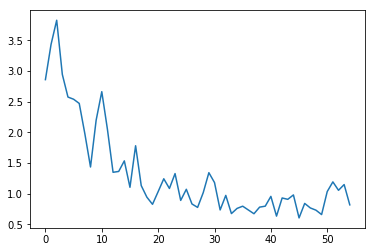

In [ ]:
plt.plot(sgd_losses)

This is the typical way SGD as is it known in the literature converges. 

In [ ]:
# The accuracy calculated from the weights found from stochastic gradient descent 
#np.argmin(sgd_losses)
accuracy(images_tst,sgd_ws[-1],labels_tst)

0.8108

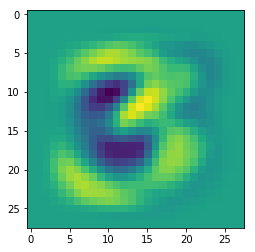

In [ ]:
import scipy
plt.imshow(scipy.reshape(w[:,3],[28,28]))

# Take the corresponding column from the weight array 
# Here we can visualise our weights to see what they look like using the scipy package


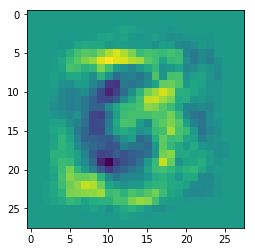

In [ ]:
s_w = sgd_ws[-1]
plt.imshow(scipy.reshape(s_w[:,3],[28,28]))

Whilst the results here do not make for compelling use of SGD when data sets are large it and its variants are the only viable and computationally  tractable methods for optimization. Most of the optimization techniques are based of SGD and variants of it such as adam, adagrad and rmsprop. These methods sacrifice some accuracy for speed which is more important in many cases. 

Another matter concerns the convexity of the loss function, generally in optimization the function is not convex and this method depending on its starting point can get stuck in local minima also the differentiability  of the loss function comes into question (even when they can be found they can be expensive to compute). Stochastic gradient descent and shot gun restart work well in this cases and are very efficient  (working with approximation of the gradients). Many of the algorithms can determine when they are "stuck" (no improvement  or repeating values) and reset the starting position or the initial gradient in this case. 

A faster converging method that could have been used is newton method however it has a flaw in that its evaluation requires the inversion of hessian matrix that is large and this is a computationally  expensive process. Inverting matrices even when possible is not advisable, some numerical method with some regularization should be used in this case. 

To conclude this shows how optimization algorithms work for dummy problems that are not entirely indicative of real world performance. However an insight can be gained as to how they work and which are most suitable for a given situation. 

Juliani, A. (2016). Simple Softmax Regression in Python — Tutorial. [online] Medium. Available at: https://medium.com/@awjuliani/simple-softmax-in-python-tutorial-d6b4c4ed5c16 [Accessed 7 Dec. 2019].

Czepiel, S. (2019). Maximum Likelehood Estimation of Logistic Regression models: Theory and Implementation. [online] Czep.net. Available at: https://czep.net/stat/mlelr.pdf [Accessed 7 Dec. 2019].